
##  CarreFour Kenya Sale Increment Strategies.
### 1. Research Question

Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax).This project is aimed at doing analysis on the dataset provided by carrefour and create insights on how to achieve highest sales. 


### 2. Metric of Success
Identifying the principal components that contribute a highly to behaviour of sales.

### 3. Understanding the context.

The provided data if from Carre Four Kenya's database and shows transactions that have been underway over a certain period. This is a reflection of behaviour of sales at carre four and well use it to identify principal components in the transactions.

### 4. Recording the Experimental Design

a. Data Loading

b. Data Cleaning and preprocessing

c. Exploratory Data Analysis

d. Implementing PCA.

e. Recommendations and Conclusions.

### 5. Data Relevance.

The provided data is relevant for this kind of study since it has a reflection of carre four sales.

### Data Preview

#### Loading the libraries

In [49]:
install.packages('data.table')
install.packages('tidyverse')
install.packages("dplyr")
install.packages("modelr")
install.packages("broom")
install.packages("caret")
install.packages("rpart")
install.packages("ggplot2")
install.packages("Amelia")
library(modelr)
library(broom)
library(caret)
library(rpart)
library(ggplot2)
library(Amelia)
library(dplyr)
library(data.table)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [50]:
carrefour <- fread('http://bit.ly/CarreFourDataset')
head(carrefour, 6)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [51]:
tail(carrefour, 6)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


In [52]:
# checking on data types
str(carrefour)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  16 variables:
 $ Invoice ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross margin percentage: num  4.76 4.7

In [53]:
# Checking on dataset description
summary(carrefour)

  Invoice ID           Branch          Customer type         Gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Product line         Unit price       Quantity          Tax         
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

In [54]:
# checking the size/shape of a dataframe 
dim(carrefour)

[1] 1000   16

### Data Preprocessing.

#### i. Completeness

In [55]:
# This is achieved by checking for missing values if any imputed to ensure correct predictions are made.

is.null(carrefour)

[1] FALSE

In [56]:
# Total number of null valuesin dataset
total_null <- sum(is.na(carrefour))
total_null

[1] 0

####ii. Consistency.

In [57]:

# Consistency is achieved when all the duplicated rows are done away with.

duplicated_rows <- carrefour[duplicated(carrefour), ]
duplicated_rows

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [58]:
duplicated(carrefour)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

#### iii. Relevance.
Relevance is achieved by ensuring all the features provided for the analysis are relevant to the objective Which in this case all provided features are.

#### iv. Accuracy.

Checking that all entries are correct.

#### Outliers
We can visualize any outliers in a dataset using boxplots

In [59]:
colnames(carrefour)

[1] "Invoice ID"              "Branch"                 
 [3] "Customer type"           "Gender"                 
 [5] "Product line"            "Unit price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross margin percentage" "gross income"           
[15] "Rating"                  "Total"

In [60]:
#Renaming column names
# Rename column where names 
names(carrefour)[names(carrefour) == "Invoice ID"] <- "Invoice_ID"
names(carrefour)[names(carrefour) == "Customer type"] <- "Customer_type"
names(carrefour)[names(carrefour) == "Product line"] <- "Product_line"
names(carrefour)[names(carrefour) == "gross margin percentage"] <- "gross_margin_percentage"
names(carrefour)[names(carrefour) == "Unit price"] <- "Unit_price"
names(carrefour)[names(carrefour) == "gross income"] <- "gross_income"
colnames(carrefour)

[1] "Invoice_ID"              "Branch"                 
 [3] "Customer_type"           "Gender"                 
 [5] "Product_line"            "Unit_price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross_margin_percentage" "gross_income"           
[15] "Rating"                  "Total"

In [61]:
str(carrefour)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  16 variables:
 $ Invoice_ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer_type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product_line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit_price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross_margin_percentage: num  4.76 4.7

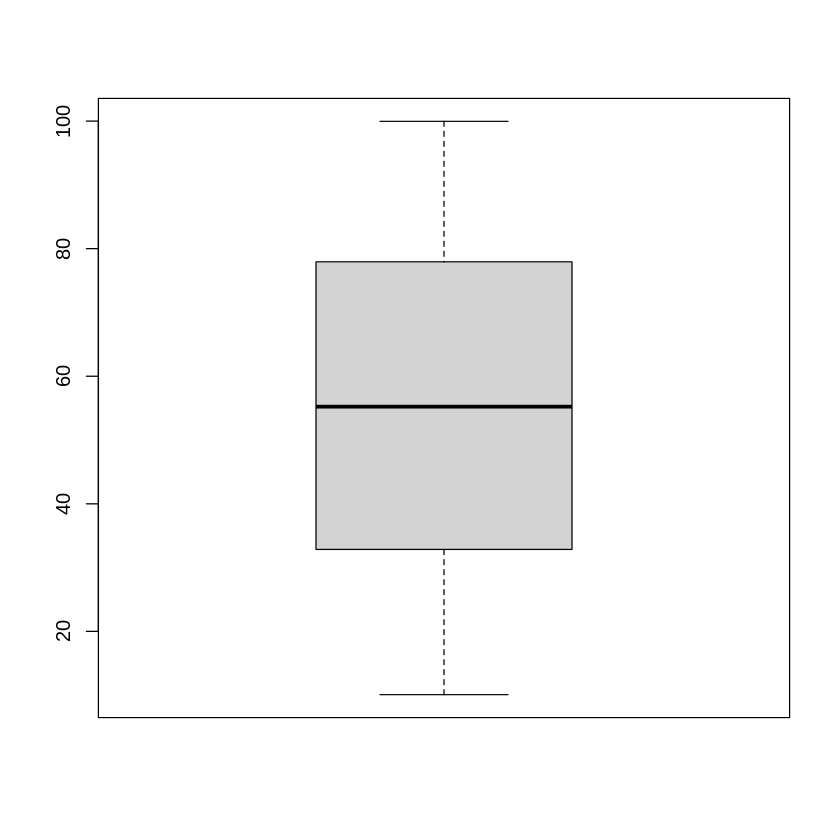

In [62]:
# Unit Price.
a <- carrefour$Unit_price
boxplot(a)


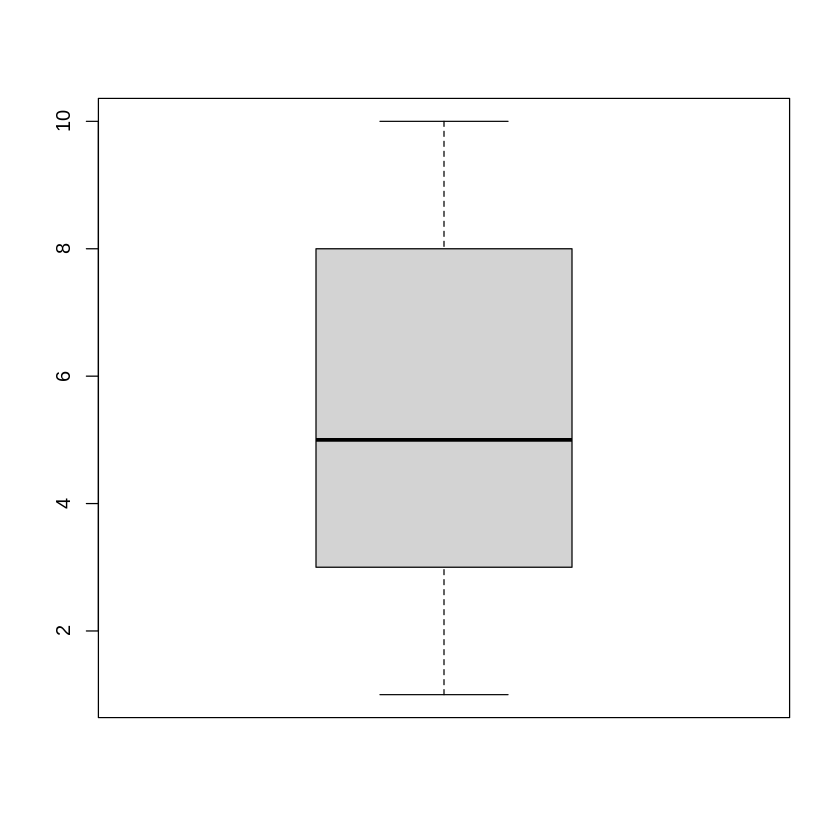

In [63]:
# Quantity
quantity <- carrefour$Quantity
boxplot(quantity)

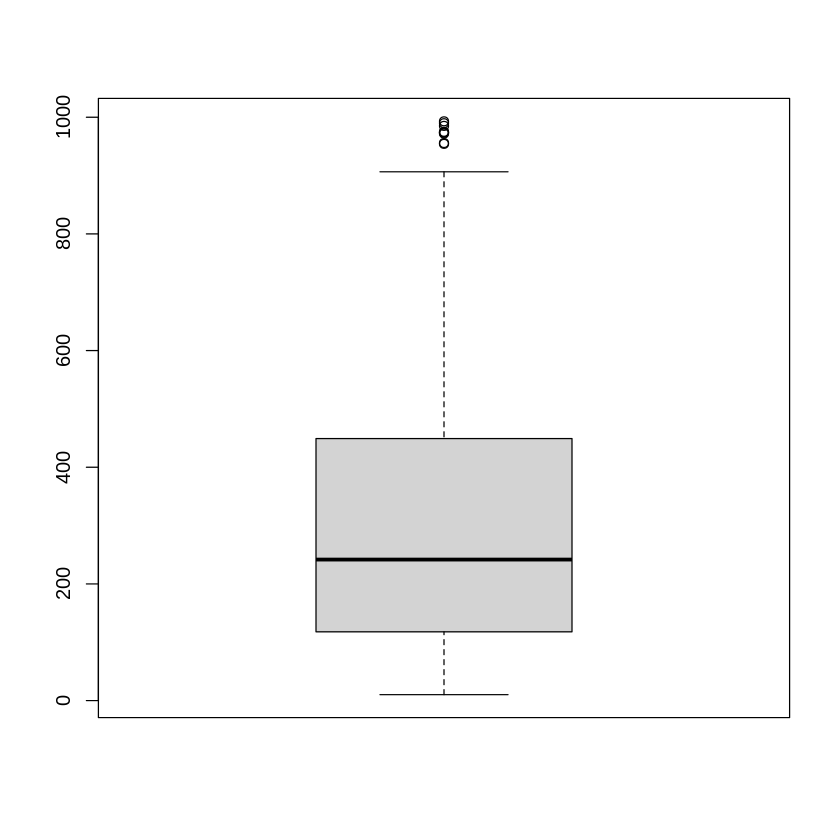

In [64]:
# cogs
cogs <- carrefour$cogs
boxplot(cogs)

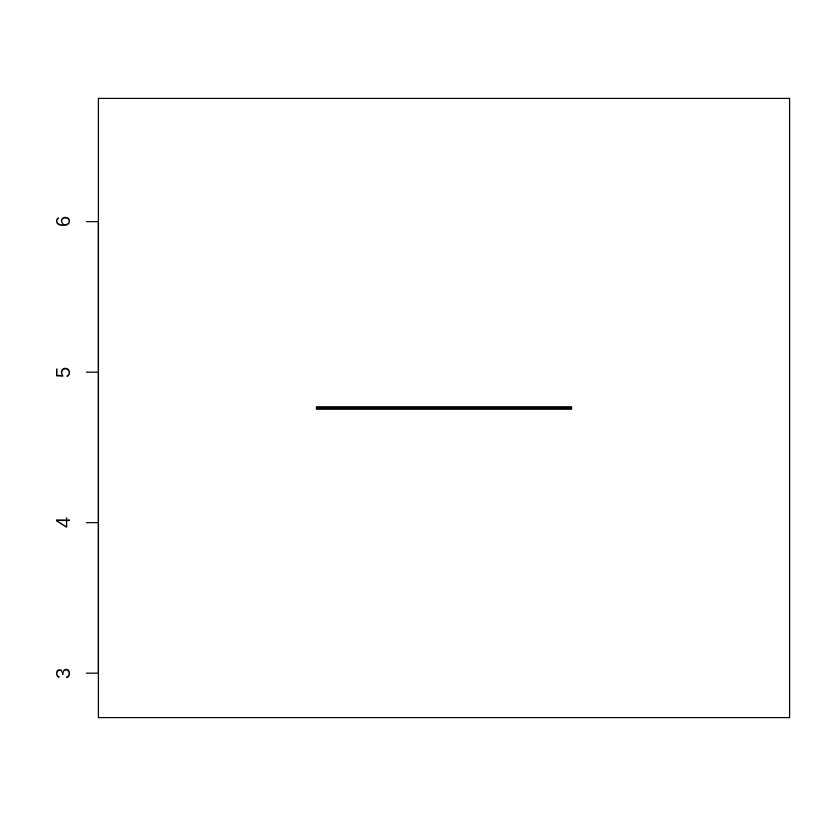

In [65]:
# Gross margin percentage
b <- carrefour$gross_margin_percentage
boxplot(b)

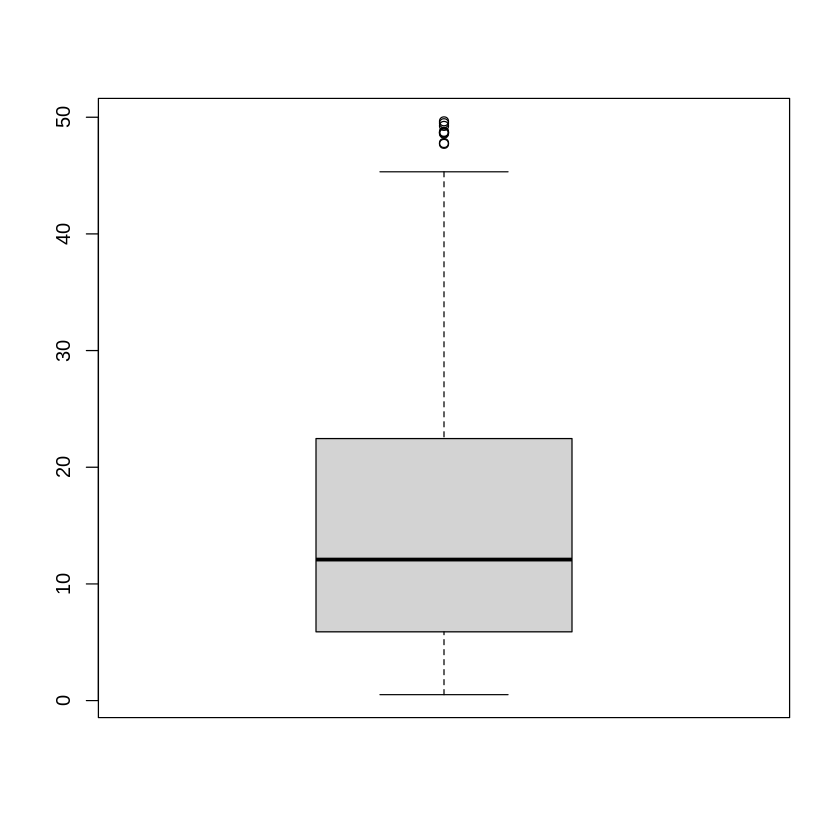

In [66]:
# Gross income
gross_income <- carrefour$gross_income
boxplot(gross_income)

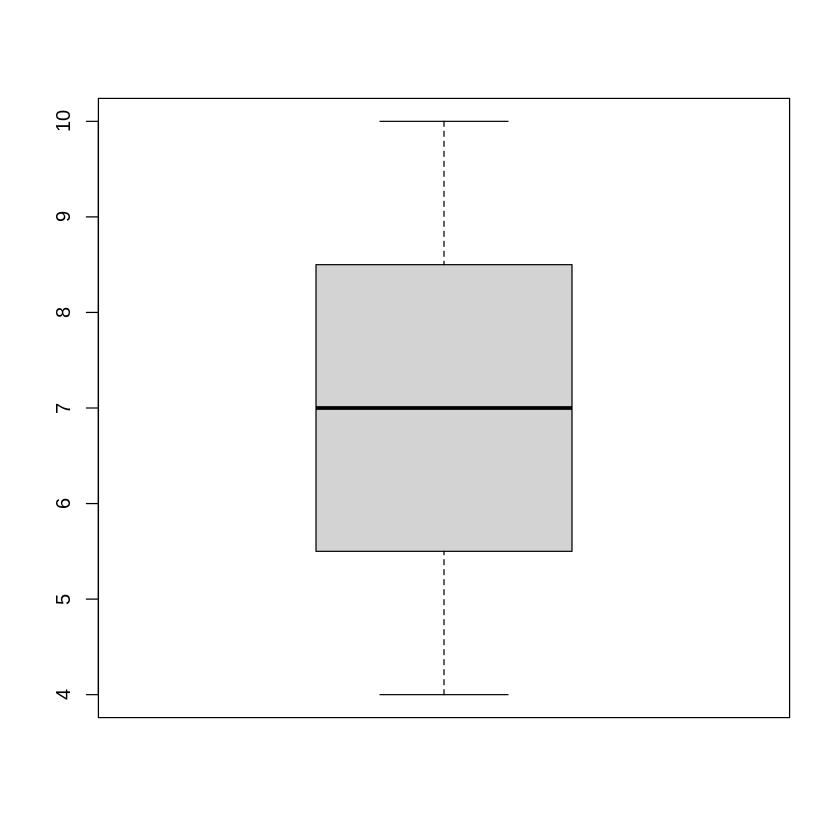

In [67]:
# Rating 
rating <- carrefour$Rating 
boxplot(rating)

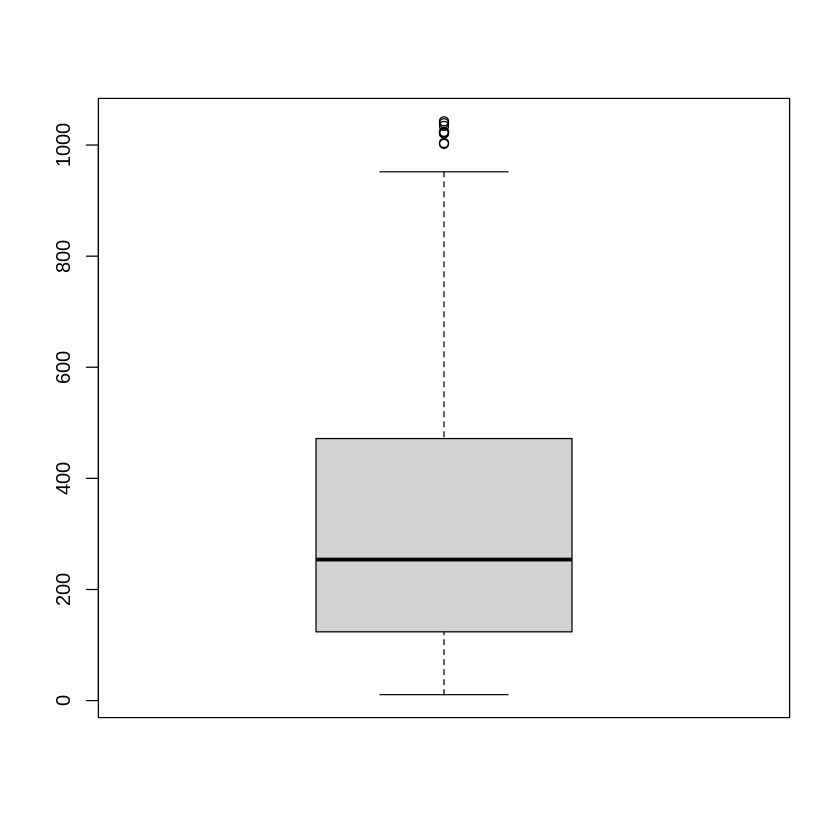

In [68]:
# Total 
total <- carrefour$Total 
boxplot(total)

###### The total and gross income have outliers .

 To see the number of outliers

In [69]:
# Gross Income
a <- carrefour$gross_income
boxplot.stats(a)$out

[1] 47.790 49.490 49.650 47.720 48.605 49.260 48.750 48.685 48.690

The outlier entries are 9. 

### Exploratory Data Analysis.
#### Univariate Analysis.

In [70]:
# a.Unit Price
mean(carrefour$Unit_price, trim = 0, na.rm=FALSE)
median(carrefour$Unit_price,na.rm=FALSE)
range(carrefour$Unit_price,na.rm=FALSE, finite=FALSE)
quantile(carrefour$Unit_price, probs=seq(0, 1,0.25), na.rm=FALSE, names=TRUE, type=7)
var(carrefour$Unit_price)
sd(carrefour$Unit_price,na.rm=FALSE)

[1] 55.67213

[1] 55.23

[1] 10.08 99.96

0%    25%    50%    75%   100% 
10.080 32.875 55.230 77.935 99.960

[1] 701.9653

[1] 26.49463

In [71]:
# mode
getmode <- function(v){
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]}

In [72]:
unit_price_mode <- getmode(carrefour$Unit_price)
unit_price_mode

[1] 83.77

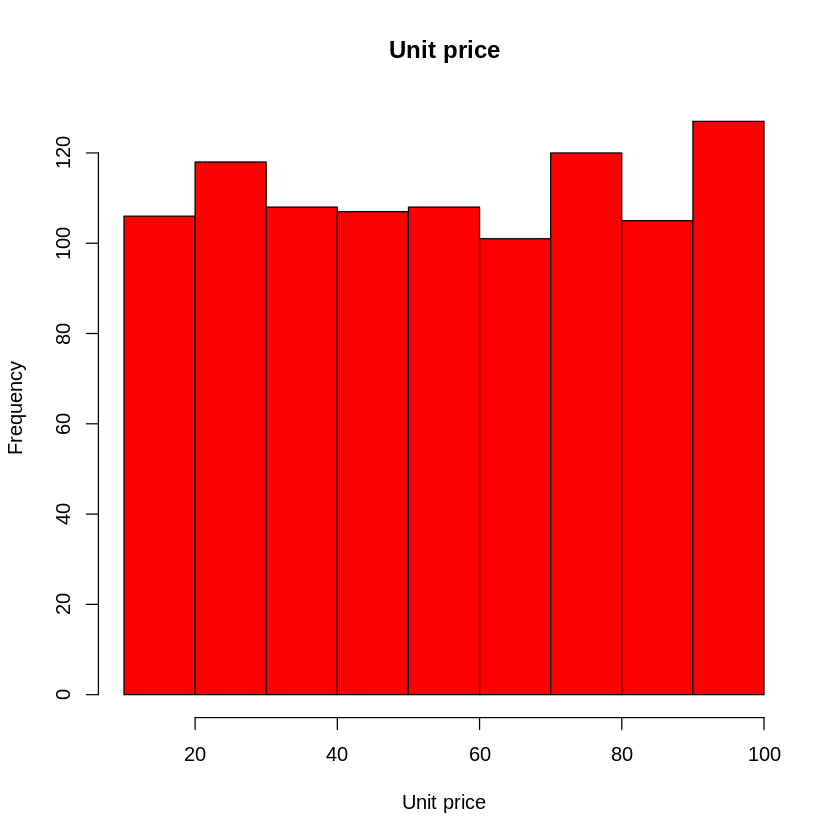

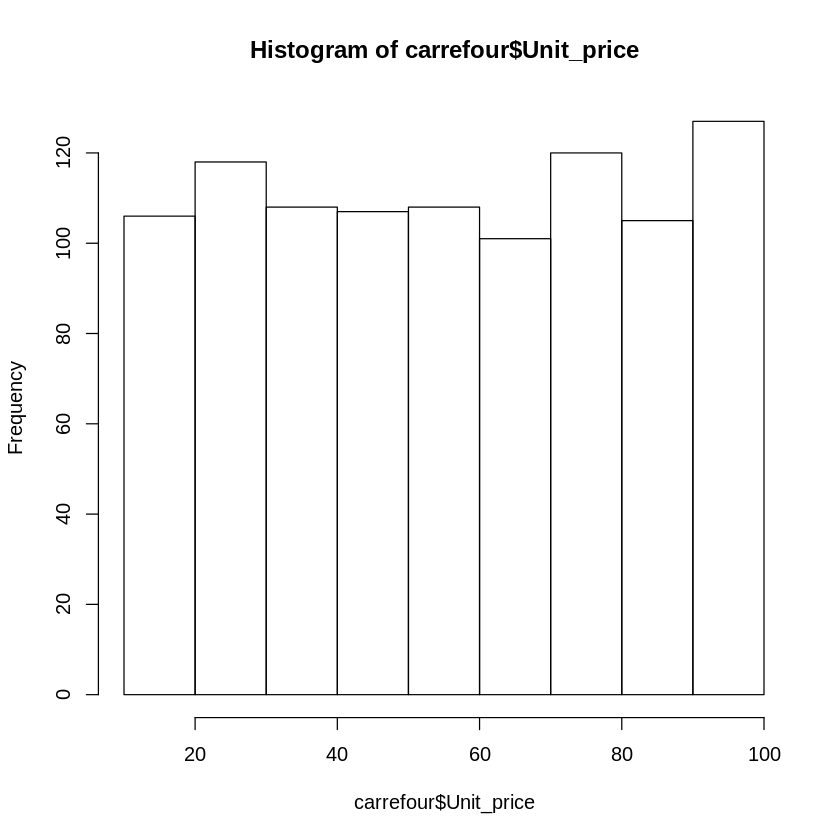

In [73]:
# Visualizing Unit Price.

d<-hist(carrefour$Unit_price, breaks=10, col="red", xlab="Unit price",main="Unit price")
plot(d)

# The highest unit prices are between 20-30, 70-80 and 90-100.

In [74]:
head(carrefour)

Invoice_ID,Branch,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


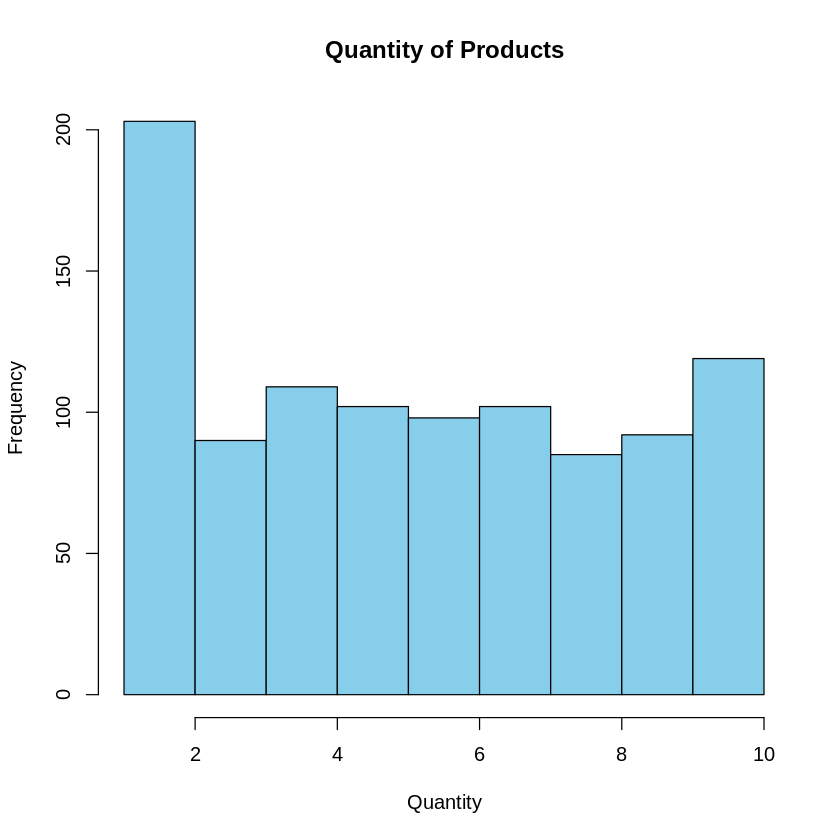

In [75]:
# b. Quantity

hist(carrefour$Quantity, breaks=12, col="skyblue",xlab="Quantity", main='Quantity of Products')

# Most product quantities bought are 1 or 2.

Warning message:
“In density.default(carrefour$Tax, xlab = "Tax") :
 extra argument ‘xlab’ will be disregarded”


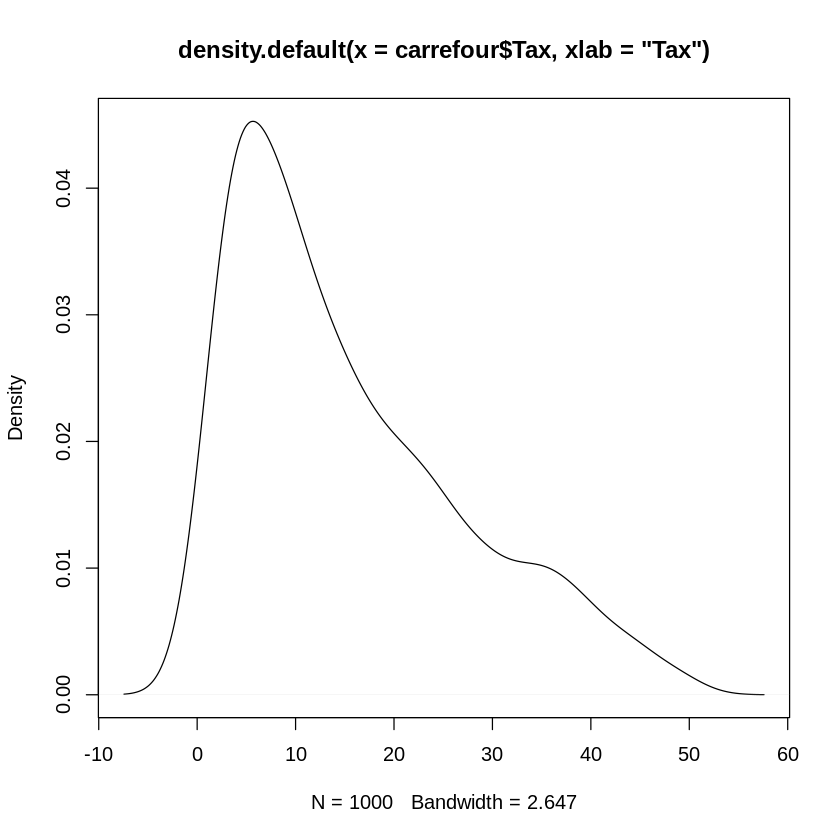

In [76]:
# c. Tax.

d <- density(carrefour$Tax, xlab="Tax")
plot(d)

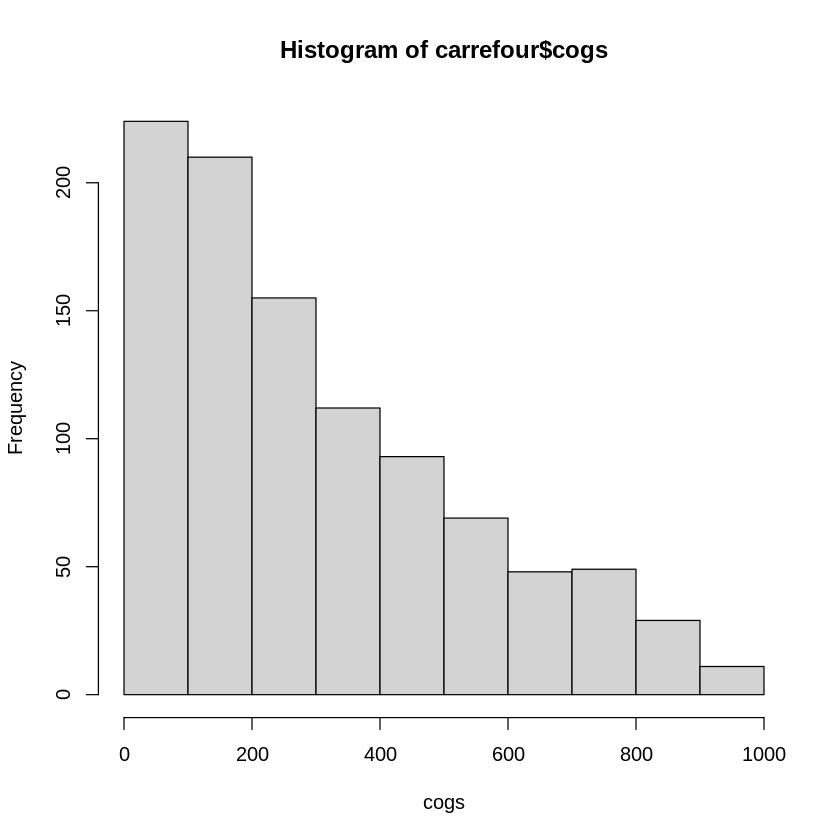

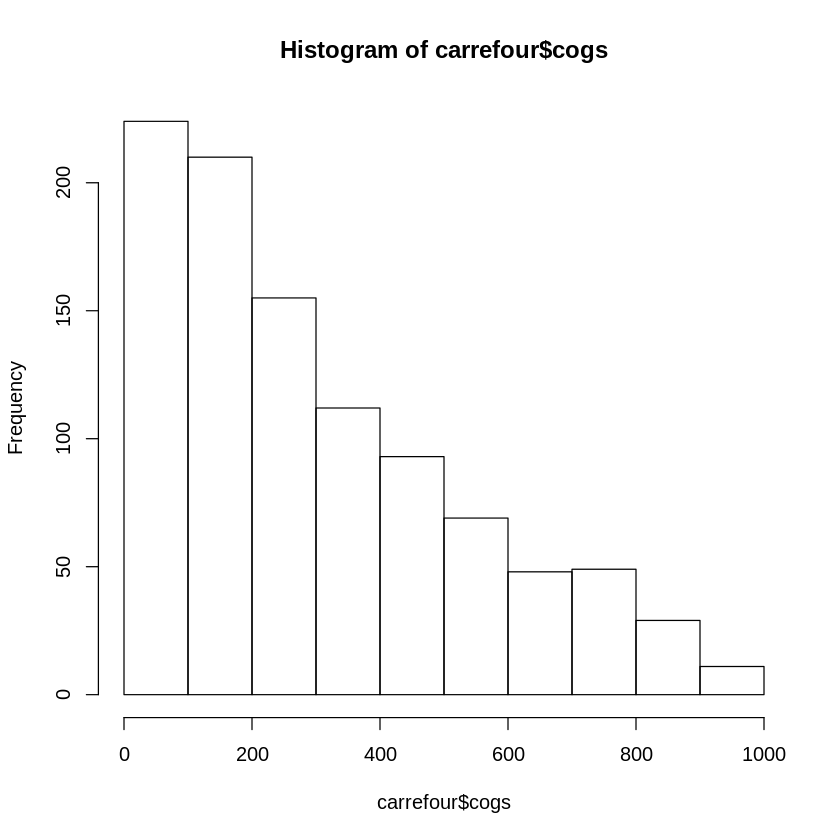

In [77]:
# d. cogs

cogs <- hist(carrefour$cogs, xlab="cogs")
plot(cogs)

The highest number of cogs is at zero but the occurence reduces as the value of cogs increases.


### Bivariate Analysis.
Covariance 
Covariance is the statistical representation of the degree to which two variables vary from each other.



#### Covariance.

In [78]:
carrefour_cov <- carrefour[,c(6,7,8,12,14,16)]
cov(carrefour_cov)

,Unit_price,Quantity,Tax,cogs,gross_income,Total
Unit_price,701.9653313,0.8347785,196.66834,3933.3668,196.66834,4130.035
Quantity,0.8347785,8.5464464,24.14957,482.9914,24.14957,507.141
Tax,196.6683401,24.1495704,137.09659,2741.9319,137.09659,2879.028
cogs,3933.3668019,482.9914076,2741.93188,54838.6377,2741.93188,57580.570
gross_income,196.6683401,24.1495704,137.09659,2741.9319,137.09659,2879.028
Total,4130.0351420,507.1409780,2879.02848,57580.5695,2879.02848,60459.598


In [79]:
carrefour.cor <- cor(carrefour_cov, method=c('spearman'))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



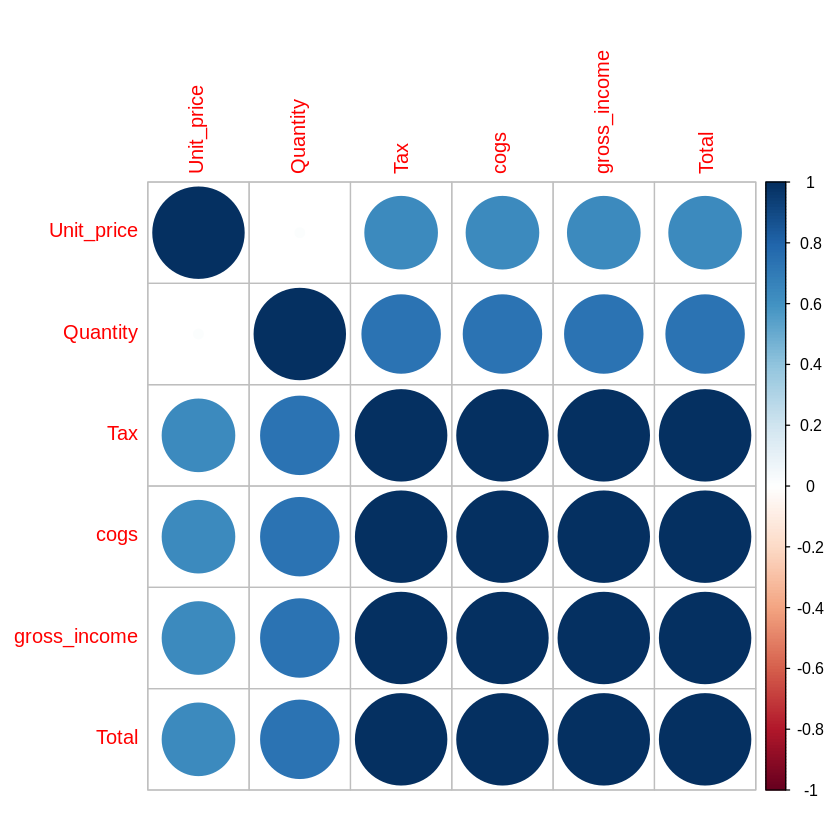

In [80]:
# visualizing

install.packages('corrplot')
library(corrplot)
corrplot(carrefour.cor)

# cogs,gross income, tax and total are highly correlated to each other.


### IMPLEMENTATION.

In [81]:
# 1.Dimensionality Reduction.

carrefour_1 <- carrefour
head(carrefour_1)

Invoice_ID,Branch,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [82]:
# passing numerical data to prcomp()

carrefour.pca <- prcomp(carrefour_1[,c(6,7,8,12,14,15,16)], center =TRUE, scale. = TRUE)
summary(carrefour.pca)

Importance of components:
                          PC1    PC2    PC3     PC4       PC5       PC6
Standard deviation     2.2185 1.0002 0.9939 0.30001 3.132e-16 1.457e-16
Proportion of Variance 0.7031 0.1429 0.1411 0.01286 0.000e+00 0.000e+00
Cumulative Proportion  0.7031 0.8460 0.9871 1.00000 1.000e+00 1.000e+00
                             PC7
Standard deviation     3.219e-17
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

We obtain 7 principal components each explaining the total variation of dataset.
PC1 explains 70% and PC2 and PC3 14% each.

In [83]:
str(carrefour.pca)

List of 5
 $ sdev    : num [1:7] 2.22 1.00 9.94e-01 3.00e-01 3.13e-16 ...
 $ rotation: num [1:7, 1:7] -0.292 -0.325 -0.45 -0.45 -0.45 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "Unit_price" "Quantity" "Tax" "cogs" ...
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:7] 55.67 5.51 15.38 307.59 15.38 ...
  ..- attr(*, "names")= chr [1:7] "Unit_price" "Quantity" "Tax" "cogs" ...
 $ scale   : Named num [1:7] 26.49 2.92 11.71 234.18 11.71 ...
  ..- attr(*, "names")= chr [1:7] "Unit_price" "Quantity" "Tax" "cogs" ...
 $ x       : num [1:1000, 1:7] -2.005 2.306 -0.186 -1.504 -2.8 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [84]:
# Plotting PCA.

install.packages("devtools")
install_github("vqv/ggbiplot")
library(devtools)
library(ggbiplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



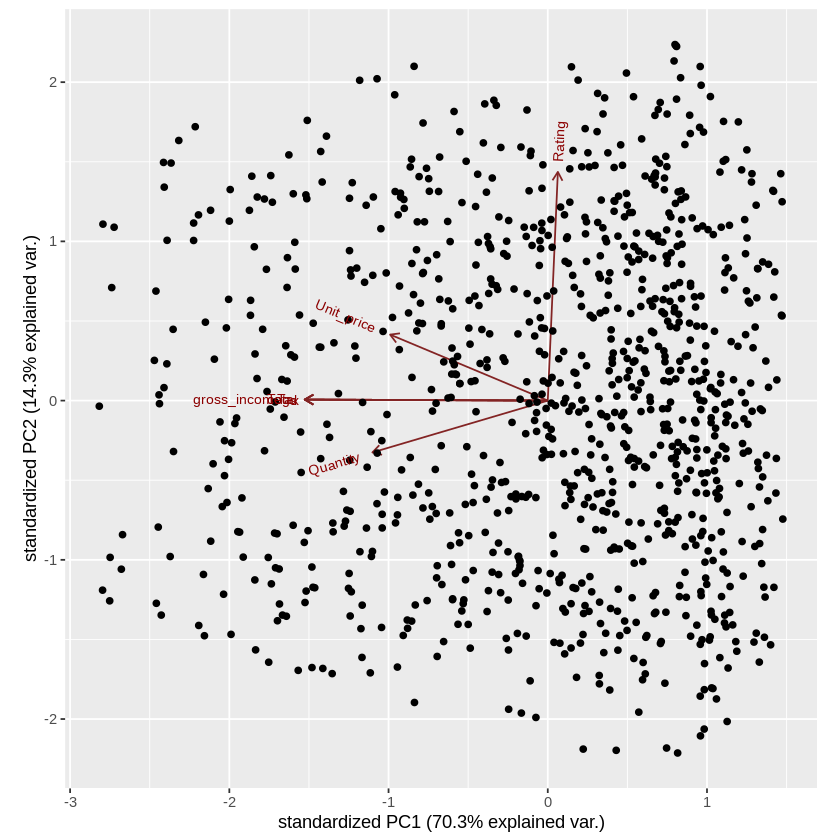

In [85]:
ggbiplot(carrefour.pca)


### Follow up questions.
#### Did we have enough data for the study?
yes

#### Was the data relevant?
yes